In [86]:
import pandas as pd

In [87]:
loop12_l = pd.read_csv("/Users/rezadoobary/Downloads/predictions_den_graph_data_12.csv")
loop11_l = pd.read_csv("/Users/rezadoobary/Downloads/train_678910_test_11_predictions.csv")
loop11_lm1 = pd.read_csv("/Users/rezadoobary/Downloads/train_6789_test_11_predictions.csv")
loop10 = pd.read_csv("/Users/rezadoobary/Downloads/train_6789_test_10_predictions.csv")

In [100]:
def get_prop(loop10):
    m = loop10[loop10['y_true'] == 1]['y_prob'].min()
    return loop10[(loop10['y_prob'] < m)].shape[0]/(loop10['y_true'] == 0).count().item()*100

In [101]:
get_prop(loop10)

19.33808367916895

In [102]:
get_prop(loop11_l), get_prop(loop11_lm1), get_prop(loop12_l)


(4.470683472947065, 10.588392637256069, 0.13499807186506835)

In [8]:
import json

res = json.load(open("/Users/rezadoobary/Downloads/den_graph_data_list_10to11.json", 'r'))

mapper = res['mapping']

In [9]:
(abs(loop12_l['y_prob'] - loop12_l['y_true']) < 0.1).mean()

np.float64(0.9236385178745057)

In [10]:
import pandas  as pd

In [11]:
df_10 = pd.read_csv("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/Tree_classifier_for_graphs/new_stuff/features/den_graphs/10loopfeats_enhanced.csv")
df_11 = pd.read_csv("/Users/rezadoobary/Documents/MLCORRELATORS/ML-correlator/Tree_classifier_for_graphs/new_stuff/features/den_graphs/11loopfeats_enhanced.csv")

['Centrality_betweenness_mean',
 'Centrality_betweenness_max',
 'Centrality_betweenness_std',
 'Centrality_betweenness_skew',
 'Centrality_closeness_mean',
 'Centrality_closeness_max',
 'Centrality_closeness_std',
 'Centrality_closeness_skew',
 'Centrality_eigenvector_mean',
 'Centrality_eigenvector_max',
 'Centrality_eigenvector_std',
 'Centrality_eigenvector_skew',
 'Centrality_closeness_mean_norm',
 'Centrality_closeness_max_norm']

In [42]:
df10eig = df_10[[f'Spectral_lap_eig_{i}' for i in range(0,8)] + [x for x in df_10.columns if 'centrality' in x.lower() and 'skew' not in x.lower()]+ [x for x in df_10.columns if 'motif' in x.lower()]]
df11eig = df_11[[f'Spectral_lap_eig_{i}' for i in range(0,8)] + [x for x in df_11.columns if 'centrality' in x.lower() and 'skew' not in x.lower() ]+[x for x in df_11.columns if 'motif' in x.lower() ]]

In [43]:
df10eig.isnull().sum()

Spectral_lap_eig_0                      0
Spectral_lap_eig_1                      0
Spectral_lap_eig_2                      0
Spectral_lap_eig_3                      0
Spectral_lap_eig_4                      0
Spectral_lap_eig_5                      0
Spectral_lap_eig_6                      0
Spectral_lap_eig_7                      0
Centrality_betweenness_mean             0
Centrality_betweenness_max              0
Centrality_betweenness_std              0
Centrality_closeness_mean               0
Centrality_closeness_max                0
Centrality_closeness_std                0
Centrality_eigenvector_mean             0
Centrality_eigenvector_max              0
Centrality_eigenvector_std              0
Centrality_closeness_mean_norm          0
Centrality_closeness_max_norm           0
Motif_triangles                         0
Motif_wedges                            0
Motif_4_cycles                          0
Motif_4_cliques                         0
Motif_triangle_edge_incidence_mean

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt

print(f"df11eig shape: {df11eig.shape}")
print(f"df10eig shape: {df10eig.shape}")
print(f"Full matrix would be: {df11eig.shape[0]} x {df10eig.shape[0]} = {df11eig.shape[0] * df10eig.shape[0]:,} elements")


df11eig shape: (1697302, 47)
df10eig shape: (153252, 47)
Full matrix would be: 1697302 x 153252 = 260,114,926,104 elements


In [45]:
# MEMORY-EFFICIENT: Batch processing to compute max similarity
# Only stores max/mean per row, not the full matrix

def compute_similarities_batched(df_query, df_reference, batch_size=1000):
    """
    Compute max and mean cosine similarity for each query row against all reference rows.
    Processes in batches to avoid memory issues.
    """
    n_query = len(df_query)
    max_sims = np.zeros(n_query)
    mean_sims = np.zeros(n_query)
    best_match_idx = np.zeros(n_query, dtype=int)
    
    # Normalize reference once (for cosine similarity)
    ref_normalized = normalize(df_reference.values)
    
    for start in range(0, n_query, batch_size):
        end = min(start + batch_size, n_query)
        batch = df_query.values[start:end]
        batch_normalized = normalize(batch)
        
        # Cosine similarity = dot product of normalized vectors
        sim_batch = batch_normalized @ ref_normalized.T
        
        max_sims[start:end] = sim_batch.max(axis=1)
        mean_sims[start:end] = sim_batch.mean(axis=1)
        best_match_idx[start:end] = sim_batch.argmax(axis=1)
        
        if (end % 10000 == 0) or (end == n_query):
            print(f"Processed {end}/{n_query} rows...")
    
    return max_sims, mean_sims, best_match_idx

max_sim_per_11, mean_sim_per_11, best_match_idx = compute_similarities_batched(df11eig, df10eig, batch_size=1000)
print("Done!")


Processed 10000/1697302 rows...
Processed 20000/1697302 rows...
Processed 30000/1697302 rows...
Processed 40000/1697302 rows...
Processed 50000/1697302 rows...
Processed 60000/1697302 rows...
Processed 70000/1697302 rows...
Processed 80000/1697302 rows...
Processed 90000/1697302 rows...
Processed 100000/1697302 rows...
Processed 110000/1697302 rows...
Processed 120000/1697302 rows...
Processed 130000/1697302 rows...
Processed 140000/1697302 rows...
Processed 150000/1697302 rows...
Processed 160000/1697302 rows...
Processed 170000/1697302 rows...
Processed 180000/1697302 rows...
Processed 190000/1697302 rows...
Processed 200000/1697302 rows...
Processed 210000/1697302 rows...
Processed 220000/1697302 rows...
Processed 230000/1697302 rows...
Processed 240000/1697302 rows...
Processed 250000/1697302 rows...
Processed 260000/1697302 rows...
Processed 270000/1697302 rows...
Processed 280000/1697302 rows...
Processed 290000/1697302 rows...
Processed 300000/1697302 rows...
Processed 310000/16

In [46]:
# Summary statistics
print("=== Max Cosine Similarity (df11eig to closest df10eig match) ===")
print(f"Mean: {max_sim_per_11.mean():.4f}")
print(f"Std:  {max_sim_per_11.std():.4f}")
print(f"Min:  {max_sim_per_11.min():.4f}")
print(f"Max:  {max_sim_per_11.max():.4f}")
print(f"\n% of df11eig with >0.99 similarity: {(max_sim_per_11 > 0.99).mean()*100:.2f}%")
print(f"% of df11eig with >0.95 similarity: {(max_sim_per_11 > 0.95).mean()*100:.2f}%")
print(f"% of df11eig with >0.90 similarity: {(max_sim_per_11 > 0.90).mean()*100:.2f}%")


=== Max Cosine Similarity (df11eig to closest df10eig match) ===
Mean: 0.9999
Std:  0.0001
Min:  0.9890
Max:  1.0000

% of df11eig with >0.99 similarity: 100.00%
% of df11eig with >0.95 similarity: 100.00%
% of df11eig with >0.90 similarity: 100.00%


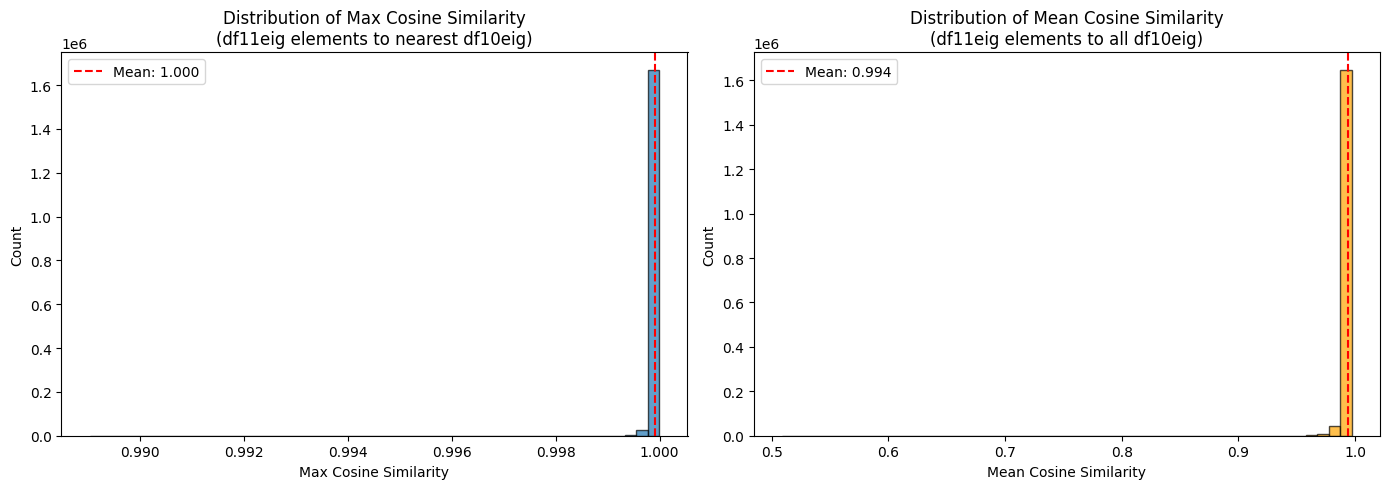

In [47]:
# Visualize the distribution of max similarities
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of max similarity scores
axes[0].hist(max_sim_per_11, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(max_sim_per_11.mean(), color='red', linestyle='--', label=f'Mean: {max_sim_per_11.mean():.3f}')
axes[0].set_xlabel('Max Cosine Similarity')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Max Cosine Similarity\n(df11eig elements to nearest df10eig)')
axes[0].legend()

# Histogram of mean similarity scores
axes[1].hist(mean_sim_per_11, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(mean_sim_per_11.mean(), color='red', linestyle='--', label=f'Mean: {mean_sim_per_11.mean():.3f}')
axes[1].set_xlabel('Mean Cosine Similarity')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Mean Cosine Similarity\n(df11eig elements to all df10eig)')
axes[1].legend()

plt.tight_layout()
plt.show()


In [48]:
# Identify outliers: df11eig elements that are most dissimilar from df10eig
results_df = pd.DataFrame({
    'df11_idx': range(len(df11eig)),
    'max_similarity': max_sim_per_11,
    'mean_similarity': mean_sim_per_11,
    'best_match_df10_idx': best_match_idx
})

# Top 10 most "out of distribution" elements
outliers = results_df.nsmallest(10, 'max_similarity')
print("=== Top 10 Most Dissimilar df11eig Elements (potential out-of-distribution) ===")
print(outliers.to_string(index=False))

# Add similarity scores to original df_11 for further analysis
df_11['max_cosine_sim_to_df10'] = max_sim_per_11
df_11['mean_cosine_sim_to_df10'] = mean_sim_per_11


=== Top 10 Most Dissimilar df11eig Elements (potential out-of-distribution) ===
 df11_idx  max_similarity  mean_similarity  best_match_df10_idx
  1095743        0.989035         0.897870               150986
   729634        0.992240         0.913112               150986
  1095777        0.992449         0.902494                51335
  1087147        0.992588         0.860057               144859
  1321057        0.992871         0.917931               151953
    27784        0.993006         0.932339               151599
   126174        0.993784         0.883777               145567
   988085        0.994029         0.809666                60639
  1087152        0.994287         0.878657               145567
   975942        0.994369         0.910109               151600


In [76]:
# Compute percentiles in 5% increments for both similarity metrics
percentiles = np.arange(0, 105, 5)  # 0, 5, 10, ..., 100

max_sim_percentiles = np.percentile(df_11['max_cosine_sim_to_df10'], percentiles)
mean_sim_percentiles = np.percentile(df_11['mean_cosine_sim_to_df10'], percentiles)

# Create a nice table
percentile_df = pd.DataFrame({
    'Percentile': [f'{p}th' for p in percentiles],
    'max_cosine_sim_to_df10': max_sim_percentiles,
    'mean_cosine_sim_to_df10': mean_sim_percentiles
})

print("=== Percentile Distribution (5% increments) ===")
print(percentile_df.to_string(index=False))

# Add percentile bin index columns to df_11
# Assign each row to a percentile bin index (0=0th, 1=5th, 2=10th, ..., 20=100th)
percentile_bin_labels = list(range(len(percentiles) - 1))  # 0, 1, 2, ..., 20

df_11['max_cosine_sim_to_df10_percentile'] = pd.cut(
    df_11['max_cosine_sim_to_df10'], 
    bins=max_sim_percentiles, 
    labels=percentile_bin_labels,
    include_lowest=True,
    duplicates='drop'
).astype(int)

df_11['mean_cosine_sim_to_df10_percentile'] = pd.cut(
    df_11['mean_cosine_sim_to_df10'], 
    bins=mean_sim_percentiles, 
    labels=percentile_bin_labels,
    include_lowest=True,
    duplicates='drop'
).astype(int)

print(f"\nAdded percentile bin index columns to df_11:")
print(f"  - max_cosine_sim_to_df10_percentile: percentile bin index (0=0th, 1=5th, 2=10th, ..., 20=100th)")
print(f"  - mean_cosine_sim_to_df10_percentile: percentile bin index (0=0th, 1=5th, 2=10th, ..., 20=100th)")



=== Percentile Distribution (5% increments) ===
Percentile  max_cosine_sim_to_df10  mean_cosine_sim_to_df10
       0th                0.989035                 0.509031
       5th                0.999821                 0.989180
      10th                0.999850                 0.991422
      15th                0.999866                 0.992565
      20th                0.999875                 0.993286
      25th                0.999884                 0.993796
      30th                0.999894                 0.994182
      35th                0.999903                 0.994494
      40th                0.999910                 0.994756
      45th                0.999916                 0.994979
      50th                0.999922                 0.995176
      55th                0.999929                 0.995352
      60th                0.999936                 0.995515
      65th                0.999944                 0.995669
      70th                0.999951                 0

In [78]:
df_11['mean_cosine_sim_to_df10_percentile'].unique()

array([13, 19, 14, 11,  7,  4, 16, 15,  9, 17,  6,  8,  0, 10, 18, 12,  5,
        3,  1,  2])

In [81]:
for i in range(21):

    print(df_11[df_11['mean_cosine_sim_to_df10_percentile'] == i]['mean_cosine_sim_to_df10'].mean())

0.9838310655424412
0.9904652017219687
0.9920431755999535
0.992948870284335
0.9935523002129031
0.9939965521957156
0.9943419303819736
0.9946270529243688
0.9948706715550443
0.9950797126567934
0.9952649990322863
0.9954348639796625
0.9955929594330437
0.9957407798823998
0.9958810681183409
0.9960235192439463
0.9961696680315598
0.9963240454748791
0.9965058912857944
0.9967529947591449
nan


In [ ]:
loop11_l = pd.read_csv("/Users/rezadoobary/Downloads/train_678910_test_11_predictions.csv")

In [103]:
def get_prop(loop11_l, idx):
    loop11_l_temp = loop11_l.iloc[idx].copy()

    m = loop11_l_temp[loop11_l_temp['y_true'] == 1]['y_prob'].min()
    return loop11_l_temp[(loop11_l_temp['y_prob'] < m)].shape[0]/(loop11_l_temp['y_true'] == 0).count().item()*100


In [107]:
for i in range(2,20):

    idx_less = df_11[df_11['mean_cosine_sim_to_df10_percentile'] < i].index.values
    idx_more = df_11[df_11['mean_cosine_sim_to_df10_percentile'] >= i].index.values

    prop_less = get_prop(loop11_l, idx_less)
    prop_more = get_prop(loop11_l, idx_more)
    print(f"Percentile {i}: {prop_less} (less), {prop_more} (more), {(len(idx_more)/len(loop11_l))*100} (more_ratio)")

Percentile 2: 9.672953084586787 (less), 4.404050613686696 (more), 89.99995286637264 (more_ratio)
Percentile 3: 9.644691982592029 (less), 4.364853268787958 (more), 84.99995875807606 (more_ratio)
Percentile 4: 9.431716750966974 (less), 4.351172191736735 (more), 79.99996464977947 (more_ratio)
Percentile 5: 9.221683328384309 (less), 4.360962029134877 (more), 74.9999705414829 (more_ratio)
Percentile 6: 5.759724739832401 (less), 4.383260486604366 (more), 69.99997643318632 (more_ratio)
Percentile 7: 5.673202526361151 (less), 4.398928253535477 (more), 64.99998232488974 (more_ratio)
Percentile 8: 4.563270247937536 (less), 4.4151452157885895 (more), 59.99998821659316 (more_ratio)
Percentile 9: 4.533730652303132 (less), 6.321048594775022 (more), 54.999994108296576 (more_ratio)
Percentile 10: 4.5204683668551615 (less), 6.324743622525632 (more), 50.0 (more_ratio)
Percentile 11: 4.516258960746254 (less), 6.325593818163726 (more), 45.000005891703424 (more_ratio)
Percentile 12: 4.515893364074938 (less

In [110]:
df_11

,Unnamed: 0,COEFFICIENTS,Basic_num_nodes,Basic_num_edges,Basic_min_degree,Basic_max_degree,Basic_avg_degree,Basic_degree_std,Basic_degree_skew,Basic_density,...,TDA_Betti0_at_q25_per_node,TDA_Betti1_at_q25_per_node,TDA_Betti0_at_q50_per_node,TDA_Betti1_at_q50_per_node,TDA_Betti0_at_q75_per_node,TDA_Betti1_at_q75_per_node,max_cosine_sim_to_df10,mean_cosine_sim_to_df10,max_cosine_sim_to_df10_percentile,mean_cosine_sim_to_df10_percentile
0,0,0,15,35,4,6,4.666667,0.788811,0.664050,0.333333,...,0.066667,0.200000,0.066667,0.0,0.066667,0.0,0.999930,0.995681,11,13
1,1,0,15,35,4,6,4.666667,0.788811,0.664050,0.333333,...,0.066667,0.133333,0.066667,0.0,0.066667,0.0,0.999956,0.995783,14,13
2,2,0,15,35,4,6,4.666667,0.788811,0.664050,0.333333,...,0.066667,0.200000,0.066667,0.0,0.066667,0.0,0.999940,0.996715,12,19
3,3,0,15,35,4,6,4.666667,0.788811,0.664050,0.333333,...,0.066667,0.200000,0.066667,0.0,0.066667,0.0,0.999910,0.995812,7,14
4,4,0,15,35,4,6,4.666667,0.788811,0.664050,0.333333,...,0.066667,0.133333,0.066667,0.0,0.066667,0.0,0.999967,0.996971,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697297,49995,0,15,34,4,7,4.533333,1.024153,1.771893,0.323810,...,0.066667,0.266667,0.066667,0.0,0.066667,0.0,0.999846,0.988784,1,0
1697298,49996,0,15,34,4,7,4.533333,1.024153,1.771893,0.323810,...,0.066667,0.266667,0.066667,0.0,0.066667,0.0,0.999564,0.984880,0,0
1697299,49997,0,15,34,4,6,4.533333,0.718022,0.963695,0.323810,...,0.066667,0.200000,0.066667,0.0,0.066667,0.0,0.999943,0.992458,12,2
1697300,49998,0,15,34,4,6,4.533333,0.718022,0.963695,0.323810,...,0.066667,0.200000,0.066667,0.0,0.066667,0.0,0.999956,0.994389,14,6


In [112]:
loop11_l['diff'] = (loop11_l['y_prob'] - loop11_l['y_true'])**2

In [116]:
res = pd.concat([loop11_l, df_11], axis = 1)

In [119]:
res[['mean_cosine_sim_to_df10','diff']].corr()

,mean_cosine_sim_to_df10,diff
mean_cosine_sim_to_df10,1.000000,0.000198
diff,0.000198,1.000000


In [123]:
loop11_l[loop11_l['diff'] > 0.1]

,y_true,y_prob,y_pred,diff
6,0,0.999987,1,0.999973
18,0,0.414092,0,0.171472
19,0,0.359716,0,0.129396
24,0,0.999910,1,0.999820
25,1,0.054525,0,0.893923
...,...,...,...,...
1697270,0,0.999426,1,0.998853
1697275,0,1.000000,1,1.000000
1697291,0,0.999986,1,0.999972
1697292,0,0.999949,1,0.999898


In [126]:
def get_prop(loop10):
    m = loop10[loop10['y_true'] == 1]['y_prob'].min()
    return loop10[(loop10['y_prob'] < m)].shape[0]/(loop10['y_true'] == 0).count().item()*100

In [131]:
res = loop11_l[loop11_l['diff'] <= 0.1]
get_prop(res)

78.96750174919043

In [132]:
res = loop11_l[loop11_l['diff'] > 0.1]
get_prop(res)

0.0